In [79]:
from sklearn.experimental import enable_iterative_imputer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, f1_score, classification_report
)

from sklearn.ensemble import (
    GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import (
    BayesianRidge, LinearRegression, LogisticRegression
)
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, OrdinalEncoder
)
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## Data Reading

In [3]:
df= pd.read_csv('/content/dataset_B_training.csv')

In [4]:
df.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
0,1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",2.0,1.0,construction,0
1,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,2.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Own,Employed,Non-MSA,0.0,3.0,wholesale,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,3.0,4.0,2.0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,real_estate,1


## Data Exploration

In [5]:
df.info()                      # column types, null counts                  # summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   h1n1_concern                 4741 non-null   float64
 2   h1n1_knowledge               4734 non-null   float64
 3   behavioral_antiviral_meds    4739 non-null   float64
 4   behavioral_avoidance         4729 non-null   float64
 5   behavioral_face_mask         4752 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4741 non-null   float64
 9   behavioral_touch_face        4736 non-null   float64
 10  doctor_recc_h1n1             4437 non-null   float64
 11  chronic_med_condition        4595 non-null   float64
 12  child_under_6_months         4622 non-null   float64
 13  health_worker     

In [6]:
df.shape # (rows, columns)


(4756, 31)

In [7]:
df.columns                     # feature names


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children',
       'employment_sector', 'h1n1_vaccine'],
      dtype='object')

In [8]:
df.describe(include = 'all')

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
count,4756.00,4741.000000,4734.00000,4739.000000,4729.00000,4752.000000,4748.000000,4747.000000,4741.000000,4736.000000,4437.000000,4595.000000,4622.000000,4625.000000,2831.000000,4687.000000,4692.000000,4692.000000,4756,4532,4756,4756,4044,4530,4441,4521,4756,4722.000000,4722.000000,2392,4756.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,21,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,media,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225,1858,3831,2921,2250,2535,3466,2419,2120,NaN,NaN,546,NaN
mean,2378.50,1.658933,1.30714,0.057396,0.74096,0.077652,0.842039,0.359385,0.341278,0.704814,0.290286,0.314037,0.090437,0.141189,0.901801,3.965436,2.512361,2.412191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888818,0.542143,NaN,0.394029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.00,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,1189.75,1.000000,1.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,2378.50,2.000000,1.00000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000
75%,3567.25,2.000000,2.00000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000


In [9]:
df.isnull().sum().head(5)

,0
respondent_id,0
h1n1_concern,15
h1n1_knowledge,22
behavioral_antiviral_meds,17
behavioral_avoidance,27


## Data Cleaning

In [10]:
df.drop(columns = ['employment_sector'], inplace = True)

# Impute categorical columns using mode
cat_impute_cols = [
    'health_insurance', 'doctor_recc_h1n1', 'rent_or_own', 'employment_status',
    'education', 'marital_status', 'income_poverty',
    'chronic_med_condition', 'child_under_6_months', 'health_worker'
]

for col in cat_impute_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Impute numeric/behavioral columns using median
behavioral_cols = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
    'household_adults', 'household_children'
]

for col in behavioral_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# all missing values handled
df.isnull().sum()[df.isnull().sum() > 0]


,0


In [11]:
# cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# cat_cols

In [12]:
# from sklearn.preprocessing import OneHotEncoder

# # One-hot encode categorical columns
# df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# print("Shape after encoding:", df_encoded.shape)
# df_encoded.head()

In [13]:
# from sklearn.preprocessing import StandardScaler

# # Scale only numeric features
# num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('h1n1_vaccine')

# scaler = StandardScaler()
# df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [14]:
# print("Final Shape:", df_encoded.shape)
# print("Any Missing Values?:", df_encoded.isnull().sum().sum())
# df_encoded.head()

# df_encoded.isnull().sum()

print("Final Shape:", df.shape)
print("Any Missing Values?:", df.isnull().sum().sum())
df.head()

df.isnull().sum()

Final Shape: (4756, 30)
Any Missing Values?: 0


,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
...,...
employment_status,0
census_msa,0
household_adults,0
household_children,0


In [15]:
# from sklearn.model_selection import train_test_split

# # Define features and target
# X = df_encoded.drop('h1n1_vaccine', axis=1)
# y = df_encoded['h1n1_vaccine']

# # Split dataset (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print("Train shape:", X_train.shape)
# print("Test shape:", X_test.shape)

In [16]:
df_no_emp = df.copy()

In [17]:
# df_encoded.shape, df.shape, df_no_emp.shape

## Data Imputation Methods

In [49]:
# Categorical feature groups
ohe_features = ["sex", "income_poverty", "rent_or_own", "census_msa", "race"]
ord_features = ["age_group", "education", "marital_status", "employment_status"]

# Ordinal encoding order
age_order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]
edu_order = ["< 12 Years", "12 Years", "Some College", "College Graduate"]
marital_order = ["Not Married", "Married"]
emp_order = ["Not in Labor Force", "Unemployed", "Employed"]
ordinal_categories = [age_order, edu_order, marital_order, emp_order]

# Pipelines for categorical encoders
ohe_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

ord_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

preprocess = ColumnTransformer(
    transformers=[
        ("ohe", ohe_tf, ohe_features),
        ("ord", ord_tf, ord_features),
    ],
    remainder="passthrough"  # <-- keep all unlisted columns
)

X = df.drop(columns=["h1n1_vaccine"])
y = df["h1n1_vaccine"]

X_transformed = preprocess.fit_transform(X)

encoded_names = preprocess.get_feature_names_out()

X_prepared = pd.DataFrame(X_transformed, columns=encoded_names, index=df.index)

In [50]:
X_prepared.columns = (
    X_prepared.columns
    .str.lower()
    .str.replace('[^a-z0-9]+', '_', regex = True)
    .str.strip('_')
)

In [51]:
print("Final prepared shape:", X_prepared.shape)

X_prepared.head()

Final prepared shape: (4756, 38)


,ohe_sex_female,ohe_sex_male,ohe_income_poverty_75_000_above_poverty,ohe_income_poverty_75_000,ohe_income_poverty_below_poverty,ohe_rent_or_own_own,ohe_rent_or_own_rent,ohe_census_msa_msa_not_principle_city,ohe_census_msa_msa_principle_city,ohe_census_msa_non_msa,ohe_race_black,ohe_race_hispanic,ohe_race_other_or_multiple,ohe_race_white,ord_age_group,ord_education,ord_marital_status,ord_employment_status,remainder_respondent_id,remainder_h1n1_concern,remainder_h1n1_knowledge,remainder_behavioral_antiviral_meds,remainder_behavioral_avoidance,remainder_behavioral_face_mask,remainder_behavioral_wash_hands,remainder_behavioral_large_gatherings,remainder_behavioral_outside_home,remainder_behavioral_touch_face,remainder_doctor_recc_h1n1,remainder_chronic_med_condition,remainder_child_under_6_months,remainder_health_worker,remainder_health_insurance,remainder_opinion_h1n1_vacc_effective,remainder_opinion_h1n1_risk,remainder_opinion_h1n1_sick_from_vacc,remainder_household_adults,remainder_household_children
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,3.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.0,0.0


In [52]:
len(X_prepared.columns)

38

## Principal Component Analysis

### Feature transformation

Features 1 to 38 were obtained through Encoding.

We're transforming them using PCA.

In [53]:
pca = PCA(n_components = X_prepared.columns, copy = True, whiten = False, svd_solver = 'auto', tol = 0.0, iterated_power = 'auto', n_oversamples = 10, power_iteration_normalizer = 'auto', random_state = 42)

In [60]:
n_comp = 0.8

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = n_comp, random_state = 42, svd_solver = "auto", whiten = False))
])

X_pca = pipe.fit_transform(X_prepared)


pca_cols = [f"pc{i+1}" for i in range(X_pca.shape[1])]
PCA_df = pd.DataFrame(X_pca, columns = pca_cols, index = X_prepared.index)

explained = pipe.named_steps["pca"].explained_variance_ratio_
cum_explained = np.cumsum(explained)

In [61]:
PCA_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21
0,-1.688378,1.583714,0.042424,-1.673300,1.001484,0.623412,-1.006462,1.249131,0.058173,-0.064580,-0.382492,-0.008042,-1.333238,-1.775874,-0.737672,-0.362725,-1.067903,-0.505577,-0.744741,0.296932,1.463247
1,-0.765894,-2.150553,-1.579777,-1.697738,0.672952,-1.579283,-2.380669,-2.576485,-0.329998,0.863343,-0.305303,1.452558,-0.907108,1.699345,-2.208649,0.067337,-0.176864,0.608858,0.990453,-1.241116,1.910149
2,-0.904643,0.853815,-0.031801,-1.639040,-0.345472,-0.391461,2.195657,-1.205704,0.878576,0.031139,-1.169002,0.419719,-1.039622,0.824569,-1.292471,0.492194,-0.724225,-0.698396,0.687439,-0.744981,-0.266550
3,1.087003,-2.371901,0.294676,-2.535998,0.001574,-0.876575,-0.921408,0.571513,2.267859,0.924626,-0.669927,-0.448770,-0.204040,0.456822,-1.632459,-0.548893,0.484205,-1.362738,0.140960,-1.363469,-1.043209
4,-0.742031,-2.911784,0.137932,-0.695922,2.160778,-1.266919,-2.738012,-1.531429,-1.087376,-0.328571,-0.095417,0.500479,0.081432,0.225884,-1.610644,-1.169177,-1.579122,-0.530083,-0.972416,0.211402,0.602940


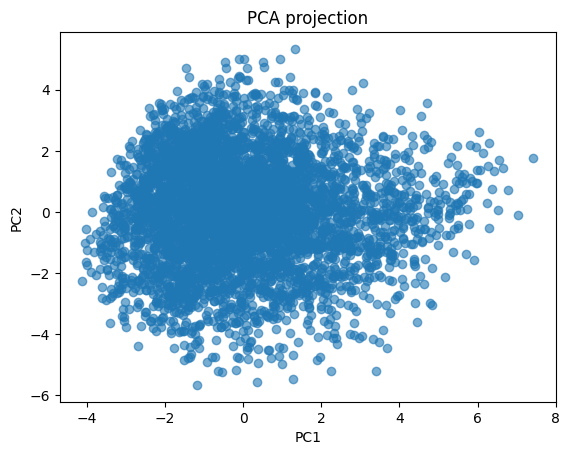

In [58]:
plt.scatter(PCA_df["pc1"], PCA_df["pc2"], alpha = 0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection")
plt.show()

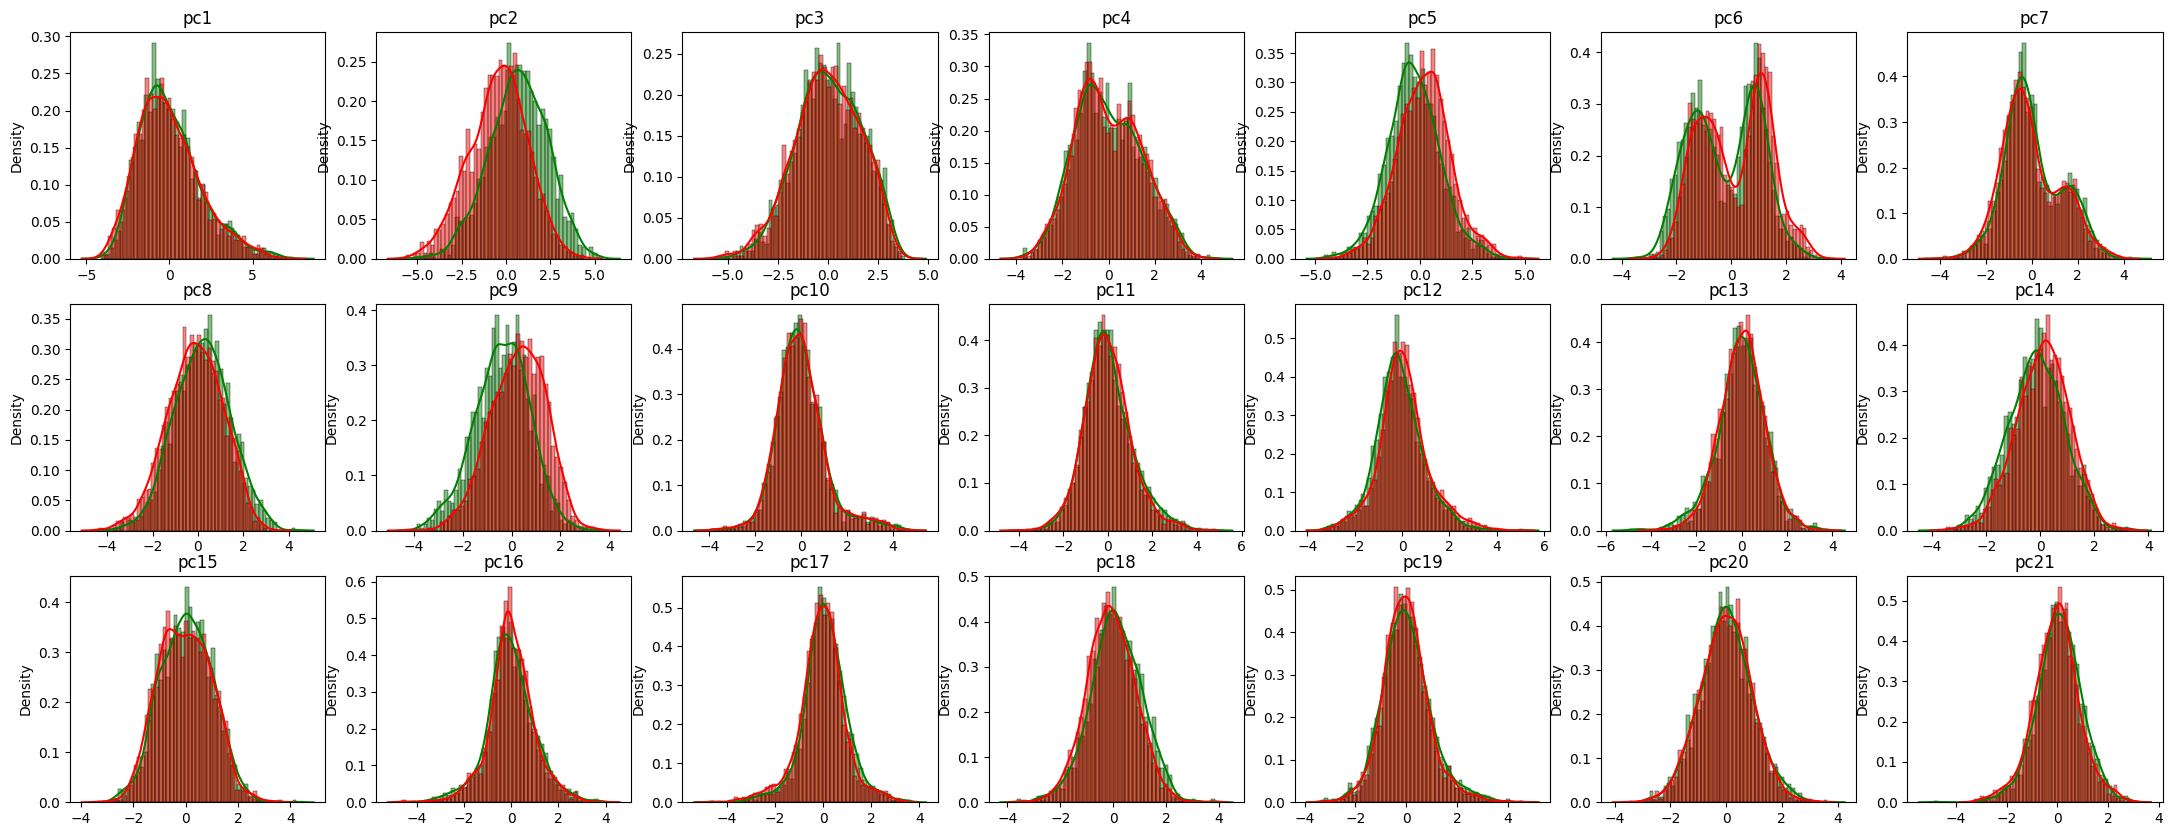

In [64]:
import matplotlib.gridspec as gridspec

columns = PCA_df.columns

grid = gridspec.GridSpec(3, 7)

plt.figure(figsize = (27, 10))

for n, col in enumerate(PCA_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(
        PCA_df[df["h1n1_vaccine"] == 1][col],
        bins = 50,
        kde = True,
        stat = "density",
        kde_kws = dict(cut = 3),
        color = "g",
    )
    sns.histplot(
        PCA_df[df["h1n1_vaccine"] == 0][col],
        bins = 50,
        kde = True,
        stat = "density",
        kde_kws = dict(cut = 3),
        color = "r",
    )
    ax.set_ylabel("Density")
    ax.set_title(str(col))
    ax.set_xlabel("")

plt.show()

In [66]:
X_pca_red = PCA_df.drop(["pc21", "pc19", "pc17", "pc13", "pc11", "pc10", "pc1"], axis = 1)
# X_pca_red = PCA_df.copy()

In [67]:
X_pca_red.head()

,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc12,pc14,pc15,pc16,pc18,pc20
0,1.583714,0.042424,-1.673300,1.001484,0.623412,-1.006462,1.249131,0.058173,-0.008042,-1.775874,-0.737672,-0.362725,-0.505577,0.296932
1,-2.150553,-1.579777,-1.697738,0.672952,-1.579283,-2.380669,-2.576485,-0.329998,1.452558,1.699345,-2.208649,0.067337,0.608858,-1.241116
2,0.853815,-0.031801,-1.639040,-0.345472,-0.391461,2.195657,-1.205704,0.878576,0.419719,0.824569,-1.292471,0.492194,-0.698396,-0.744981
3,-2.371901,0.294676,-2.535998,0.001574,-0.876575,-0.921408,0.571513,2.267859,-0.448770,0.456822,-1.632459,-0.548893,-1.362738,-1.363469
4,-2.911784,0.137932,-0.695922,2.160778,-1.266919,-2.738012,-1.531429,-1.087376,0.500479,0.225884,-1.610644,-1.169177,-0.530083,0.211402


In [68]:
len(X_pca_red.head().columns)

14

In [69]:
X_pca_red.info()
X_pca_red.isnull().sum()
X_pca_red.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc2     4756 non-null   float64
 1   pc3     4756 non-null   float64
 2   pc4     4756 non-null   float64
 3   pc5     4756 non-null   float64
 4   pc6     4756 non-null   float64
 5   pc7     4756 non-null   float64
 6   pc8     4756 non-null   float64
 7   pc9     4756 non-null   float64
 8   pc12    4756 non-null   float64
 9   pc14    4756 non-null   float64
 10  pc15    4756 non-null   float64
 11  pc16    4756 non-null   float64
 12  pc18    4756 non-null   float64
 13  pc20    4756 non-null   float64
dtypes: float64(14)
memory usage: 520.3 KB


,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc12,pc14,pc15,pc16,pc18,pc20
count,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4756.000000,4.756000e+03,4.756000e+03,4.756000e+03
mean,1.344593e-16,7.133813e-16,3.708836e-16,4.825595e-16,1.972070e-16,-3.585582e-17,7.111403e-16,-1.464112e-16,-1.225074e-16,-3.107504e-16,0.000000,2.629426e-16,-2.928225e-16,1.195194e-16
std,1.735475e+00,1.620846e+00,1.410622e+00,1.294664e+00,1.260258e+00,1.256021e+00,1.233054e+00,1.166874e+00,1.041806e+00,1.010149e+00,0.997725,9.896240e-01,9.416364e-01,9.351720e-01
min,-5.669636e+00,-5.671469e+00,-3.823367e+00,-4.566600e+00,-3.494997e+00,-4.132215e+00,-4.377500e+00,-4.375693e+00,-3.394462e+00,-3.804223e+00,-3.369824,-4.650272e+00,-3.625918e+00,-3.498565e+00
25%,-1.113274e+00,-1.087139e+00,-1.037679e+00,-8.412522e-01,-1.100335e+00,-8.615880e-01,-8.409961e-01,-7.849653e-01,-6.152761e-01,-6.648148e-01,-0.741489,-5.427071e-01,-6.309690e-01,-6.134725e-01
50%,7.108342e-02,1.176950e-02,-1.258203e-01,9.755956e-03,4.665957e-02,-2.298618e-01,2.253431e-02,5.235700e-02,-6.427466e-02,2.378428e-02,-0.001506,-3.693866e-02,-1.282658e-02,3.927187e-03
75%,1.195991e+00,1.205072e+00,1.022971e+00,8.168157e-01,1.042286e+00,8.761432e-01,8.582657e-01,8.385440e-01,5.502459e-01,6.922316e-01,0.719421,5.638889e-01,6.273908e-01,6.177487e-01
max,5.337042e+00,3.816489e+00,4.398944e+00,4.870050e+00,3.385760e+00,4.362430e+00,4.282423e+00,3.744387e+00,5.087394e+00,3.405621e+00,4.238287,4.020690e+00,3.860643e+00,3.630443e+00


In [102]:
def train_and_predict(X, y, model, random_state = 42):

    #Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = random_state
    )

    # Define the model
    model = model(random_state = random_state)

    # Train the model on original data
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    f1 = f1_score(y_test, predictions)

    accuracy = accuracy_score(y_test, predictions)

    if model.__class__.__name__:
        print(f"{model.__class__.__name__} F1 Score:", f1)
        print(f"{model.__class__.__name__} Accuracy:", accuracy)
    elif model.__name__:
        print(f"{model.__name__} F1 Score:", f1)
        print(f"{model.__name__} Accuracy:", accuracy)
    else:
        print(classification_report(y_test, predictions))

    print("\n")
    print(classification_report(y_test, predictions))

    return X_train, X_test, y_train, y_test, predictions, accuracy, f1

In [103]:
X = X_pca_red,
Y = df["h1n1_vaccine"]

In [104]:
X_train, X_test, y_train, y_test, pred, acc, f1 = train_and_predict(X_pca_red, Y, model = LogisticRegression)

LogisticRegression F1 Score: 0.659047619047619
LogisticRegression Accuracy: 0.7491240364400841


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       850
           1       0.73      0.60      0.66       577

    accuracy                           0.75      1427
   macro avg       0.74      0.73      0.73      1427
weighted avg       0.75      0.75      0.74      1427



## Modelling

In [107]:
models = [GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticRegression]

for model in models:
    print(f"Classification Report for {model.__name__} model:\n")
    _, _, _, _, pred, acc, f1 = train_and_predict(X_pca_red, Y, model = model)
    print("\n")

Classification Report for GradientBoostingClassifier model:

GradientBoostingClassifier F1 Score: 0.6545454545454545
GradientBoostingClassifier Accuracy: 0.747021723896286


              precision    recall  f1-score   support

           0       0.75      0.85      0.80       850
           1       0.73      0.59      0.65       577

    accuracy                           0.75      1427
   macro avg       0.74      0.72      0.73      1427
weighted avg       0.75      0.75      0.74      1427



Classification Report for AdaBoostClassifier model:

AdaBoostClassifier F1 Score: 0.6248812915479582
AdaBoostClassifier Accuracy: 0.7231955150665732


              precision    recall  f1-score   support

           0       0.74      0.83      0.78       850
           1       0.69      0.57      0.62       577

    accuracy                           0.72      1427
   macro avg       0.72      0.70      0.70      1427
weighted avg       0.72      0.72      0.72      1427



Classification Re

In [108]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize Ridge Classifier
ridge_clf = RidgeClassifier(alpha=1.0)

# Train
ridge_clf.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred_ridge)
f1 = f1_score(y_test, y_pred_ridge)

print("Ridge Classifier Accuracy:", acc)
print("Ridge Classifier F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge))

Ridge Classifier Accuracy: 0.7526278906797477
Ridge Classifier F1 Score: 0.6628462273161414

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80       850
           1       0.74      0.60      0.66       577

    accuracy                           0.75      1427
   macro avg       0.75      0.73      0.73      1427
weighted avg       0.75      0.75      0.75      1427



In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, classification_report

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print("Best Ridge Alpha:", ridge_grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Convert to binary for classification metrics
y_pred_ridge_binary = (y_pred_ridge >= 0.5).astype(int)

acc_ridge = accuracy_score(y_test, y_pred_ridge_binary)
f1_ridge = f1_score(y_test, y_pred_ridge_binary)

print("\n Ridge Regression Results")
print("MSE:", mse_ridge)
print("R²:", r2_ridge)
print("Accuracy:", acc_ridge)
print("F1 Score:", f1_ridge)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge_binary))


Best Ridge Alpha: {'alpha': 100}

 Ridge Regression Results
MSE: 0.1732312504350819
R²: 0.2807507004440417
Accuracy: 0.7526278906797477
F1 Score: 0.6615532118887824

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       850
           1       0.74      0.60      0.66       577

    accuracy                           0.75      1427
   macro avg       0.75      0.73      0.73      1427
weighted avg       0.75      0.75      0.75      1427



In [110]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import loguniform

# Base model
ridge_clf = RidgeClassifier(random_state=42)

# Hyperparameter distributions
param_distributions = {
    'alpha': loguniform(1e-3, 1e2),   # continuous log-uniform distribution between 0.001 and 100
    'solver': ['auto', 'saga', 'lsqr']  # categorical options
}

# Randomized search
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_clf,
    param_distributions=param_distributions,
    n_iter=20,            # number of random combinations to try (adjust as needed)
    cv=5,
    scoring='f1',         # optimize for F1 score
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit
random_search_ridge.fit(X_train, y_train)

# Best model
best_ridge_clf = random_search_ridge.best_estimator_
print("\n Best Ridge Classifier Parameters:\n", random_search_ridge.best_params_)

# Predictions
y_pred_ridge_best = best_ridge_clf.predict(X_test)

# Evaluate
acc_ridge_best = accuracy_score(y_test, y_pred_ridge_best)
f1_ridge_best = f1_score(y_test, y_pred_ridge_best)

print("\n Ridge Classifier (After Random Search Tuning)")
print(f"Accuracy: {acc_ridge_best:.4f}")
print(f"F1 Score: {f1_ridge_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best Ridge Classifier Parameters:
 {'alpha': np.float64(0.0745934328572655), 'solver': 'auto'}

 Ridge Classifier (After Random Search Tuning)
Accuracy: 0.7526
F1 Score: 0.6628

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80       850
           1       0.74      0.60      0.66       577

    accuracy                           0.75      1427
   macro avg       0.75      0.73      0.73      1427
weighted avg       0.75      0.75      0.75      1427



In [111]:
# Base model
ridge_clf = RidgeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'saga', 'lsqr']        # Different optimization solvers
}

# Grid search
grid_search_ridge = GridSearchCV(
    estimator=ridge_clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',   # Optimize for F1 score
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search_ridge.fit(X_train, y_train)

# Best model
best_ridge_clf = grid_search_ridge.best_estimator_
print("\n Best Ridge Classifier Parameters:\n", grid_search_ridge.best_params_)

# Predictions
y_pred_ridge_best = best_ridge_clf.predict(X_test)

# Evaluate
acc_ridge_best = accuracy_score(y_test, y_pred_ridge_best)
f1_ridge_best = f1_score(y_test, y_pred_ridge_best)

print("\n Ridge Classifier (After Tuning)")
print(f"Accuracy: {acc_ridge_best:.4f}")
print(f"F1 Score: {f1_ridge_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge_best))

Fitting 5 folds for each of 18 candidates, totalling 90 fits

 Best Ridge Classifier Parameters:
 {'alpha': 0.001, 'solver': 'auto'}

 Ridge Classifier (After Tuning)
Accuracy: 0.7526
F1 Score: 0.6628

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80       850
           1       0.74      0.60      0.66       577

    accuracy                           0.75      1427
   macro avg       0.75      0.73      0.73      1427
weighted avg       0.75      0.75      0.75      1427



In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print("Random Forest F1 Score:", f1_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7400140154169587
Random Forest F1 Score: 0.6380487804878049

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       850
           1       0.73      0.57      0.64       577

    accuracy                           0.74      1427
   macro avg       0.74      0.71      0.72      1427
weighted avg       0.74      0.74      0.73      1427



In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter search space
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("\n Best Random Forest Parameters:")
print(random_search.best_params_)

# Predictions
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate
acc_rf_best = accuracy_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

print("\n Random Forest (After Random Search Tuning)")
print(f"Accuracy: {acc_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best Random Forest Parameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 40}

 Random Forest (After Random Search Tuning)
Accuracy: 0.7498
F1 Score: 0.6476

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       850
           1       0.75      0.57      0.65       577

    accuracy                           0.75      1427
   macro avg       0.75      0.72      0.73      1427
weighted avg       0.75      0.75      0.74      1427

